# Module 4.2 — Positive Edge ≠ Safety
In the previous module, ruin occurred because the system was fair.      
In this module, we test a more disturbing question:     
Does a positive edge guarantee survival?    

We introduce a small statistical advantage while keeping everything else unchanged:

- finite capital
- fixed bet size
- fixed ruin threshold
- long participation

The goal is not to measure performance, but to observe survival under variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

start_capital = 100
capital_thres = 0         
n_trades = 10_000
n_paths = 1_000

p = 0.55                   # positive edge
win = 1
loss = -1

#np.random.seed(42)

expectancy = p * win + (1 - p) * loss
print(f"Expectancy per trade: {expectancy:.2f}")


Expectancy per trade: 0.10


# single Path

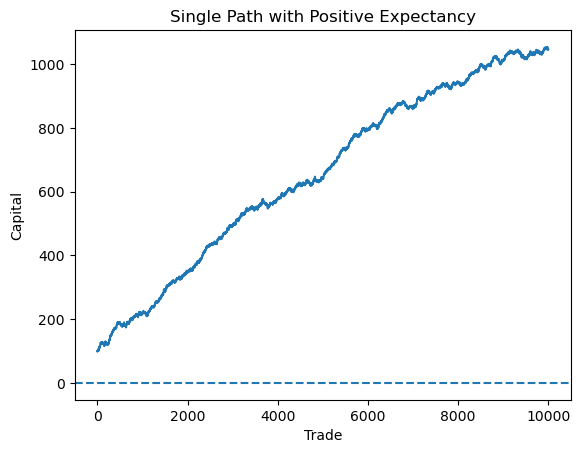

In [2]:
outcomes = np.where(
    np.random.rand(n_trades) < p,
    win,
    loss
)
capital = start_capital
path = []

for outcome in outcomes:
    if capital <= capital_thres:
        break
    capital += outcome
    path.append(capital)

plt.figure()
plt.plot(path)
plt.axhline(capital_thres, linestyle='--')
plt.title("Single Path with Positive Expectancy")
plt.xlabel("Trade")
plt.ylabel("Capital")
plt.show()    

# Multiple Paths

In [3]:
states = []
survival_times = []
final_capitals = []

for _ in range(n_paths):
    capital = start_capital
    time_alive = 0

    outcomes = np.where(
        np.random.rand(n_trades) < p,
        win,
        loss
    )

    for outcome in outcomes:
        if capital <= capital_thres:
            break
        capital += outcome
        time_alive += 1
        
    states.append(capital > capital_thres)
    survival_times.append(time_alive)
    final_capitals.append(capital)
      

In [4]:
alive = sum(states)
dead = n_paths - alive

print(f"Alive paths: {alive}")
print(f"Dead paths:  {dead}")
print(f"Survival rate: {alive / n_paths:.2%}")


Alive paths: 1000
Dead paths:  0
Survival rate: 100.00%


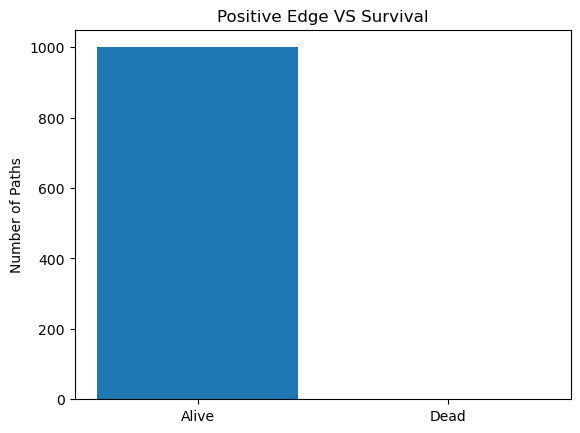

In [5]:
plt.figure()
plt.bar(["Alive", "Dead"], [alive, dead])
plt.title("Positive Edge VS Survival")
plt.ylabel("Number of Paths")
plt.show()


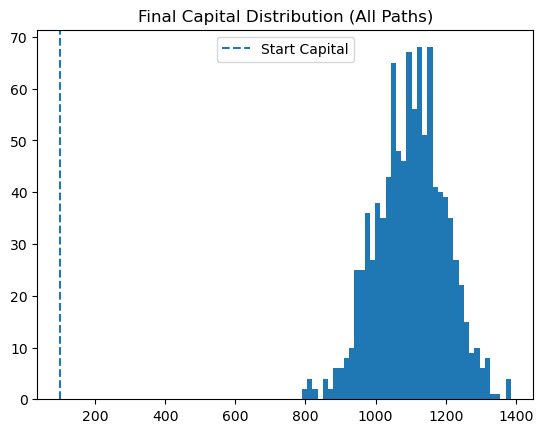

In [6]:
plt.figure()
plt.hist(final_capitals, bins=40)
plt.axvline(start_capital, linestyle='--', label="Start Capital")
plt.title("Final Capital Distribution (All Paths)")
plt.legend()
plt.show()


# Observation
### When expectancy is positive and ruin is defined only as capital reaching zero, complete ruin becomes extremely rare to the point of near-impossibility within realistic sample sizes.

Observed behavior:

- Paths overwhelmingly survive indefinitely
- Capital may experience deep drawdowns, but does not reach zero
- Compared to p = 0.5, the ruin boundary is effectively repelled
- The positive drift dominates over time, even with unfavorable sequencing
- Extinction becomes a theoretical possibility, not a practical one

In contrast to the fair system, where ruin is common and natural,the positive-expectancy system shows structural survival bias.

Ruin is not eliminated mathematically —     
but in practice, it almost never occurs.